# Benchmarking to the supporting spreadsheet of Smythe et al. (2017)


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySCSS as ss
pd.options.display.max_columns = None
import scipy.optimize as optimize

In [21]:
Liqs=ss.import_data('SCSS Calculation_Smythe_Dec2020Melts.xlsx', sheet_name="PySulfSat")

We have replaced all missing liquid oxides and strings with zeros. 


## Test 1 - Using fixed sulfide composition
- Here, we show how to perform calculations when you only know the Fe_FeCuNi ratio of the sulfide
- As you haven't entered CuFeCuNi or NiFeCuNi you won't get a result for non_ideal SCSS

In [9]:
Smythe_FixedSulf_Feonly=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['Temp (°C)']+273.15, P_kbar=Liqs['Pres (GPa)']*10, 
                               Fe_FeNiCu_Sulf=Liqs['FeFeCuNi_Fixed'],
                               Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


- If we enter the Cu and Ni ratio in the sulfide, we also get the non-ideal values

In [10]:
Smythe_FixedSulf_FeNiCu_ratios=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['Temp (°C)']+273.15, P_kbar=Liqs['Pres (GPa)']*10, 
                               Fe_FeNiCu_Sulf=Liqs['FeFeCuNi_Fixed'],
                                Cu_FeNiCu_Sulf=Liqs['CuFeCuNi_Fixed'],
                                Ni_FeNiCu_Sulf=Liqs['NiFeCuNi_Fixed'],
                               Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


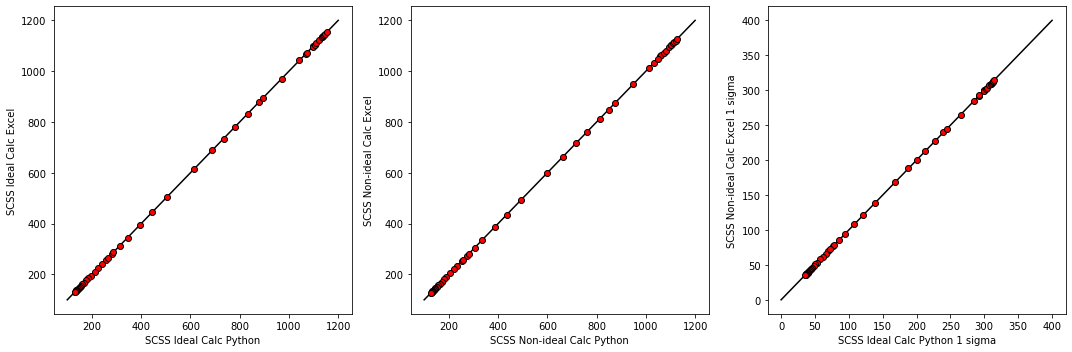

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot([100, 1200], [100, 1200], '-k')
ax1.plot(Smythe_FixedSulf_FeNiCu_ratios['SCSS_ideal_ppm_Smythe2017'], 
        Liqs['Smythe_SCSS_FixedSulfide_Ideal'],  'ok', mfc='red')

ax1.set_xlabel('SCSS Ideal Calc Python')
ax1.set_ylabel('SCSS Ideal Calc Excel')

ax2.plot([100, 1200], [100, 1200], '-k')
ax2.plot(Smythe_FixedSulf_FeNiCu_ratios['SCSS_non_ideal_ppm_Smythe2017'], 
        Liqs['Smythe_SCSS_FixedSulfide_NonIdeal'],  'ok', mfc='red')
ax2.set_xlabel('SCSS Non-ideal Calc Python')
ax2.set_ylabel('SCSS Non-ideal Calc Excel')


ax3.plot([0, 400], [0, 400], '-k')
ax3.plot(Smythe_FixedSulf_FeNiCu_ratios['SCSS_ideal_ppm_Smythe2017_1sigma'], 
        Liqs['Smythe_SCSS_FixedSulfide_Ideal_Err'],  'ok', mfc='red')
ax3.set_xlabel('SCSS Ideal Calc Python 1 sigma')
ax3.set_ylabel('SCSS Non-ideal Calc Excel 1 sigma')

fig.tight_layout()

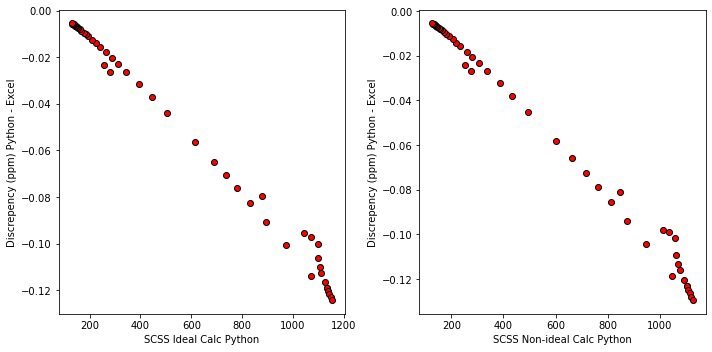

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(Smythe_FixedSulf_FeNiCu_ratios['SCSS_ideal_ppm_Smythe2017'], 
         Smythe_FixedSulf_FeNiCu_ratios['SCSS_ideal_ppm_Smythe2017']-
        Liqs['Smythe_SCSS_FixedSulfide_Ideal'],  'ok', mfc='red')
ax1.set_xlabel('SCSS Ideal Calc Python')
ax1.set_ylabel('Discrepency (ppm) Python - Excel')

ax2.plot(Smythe_FixedSulf_FeNiCu_ratios['SCSS_non_ideal_ppm_Smythe2017'],
         Smythe_FixedSulf_FeNiCu_ratios['SCSS_non_ideal_ppm_Smythe2017']- 
        Liqs['Smythe_SCSS_FixedSulfide_NonIdeal'],  'ok', mfc='red')
ax2.set_xlabel('SCSS Non-ideal Calc Python')
ax2.set_ylabel('Discrepency (ppm) Python - Excel')
fig.tight_layout()

## Test 2 - Using fixed sulfide composition where you enter the Ni, Cu and Fe contents of the sulfide

In [13]:
Smythe_FixedSulf_Meas_Sulf=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['Temp (°C)']+273.15, P_kbar=Liqs['Pres (GPa)']*10, 
                               Fe_Sulf=Liqs['Fe_Sulf_Calc'],
                               Cu_Sulf=Liqs['Cu_Sulf_Calc'], 
                               Ni_Sulf=Liqs['Ni_Sulf_Calc'],
                               Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

Using inputted Sulf compositions to calculate Fe_FeNiCu_Sulf ratios.


Text(0, 0.5, 'SCSS Non-ideal Calc Excel')

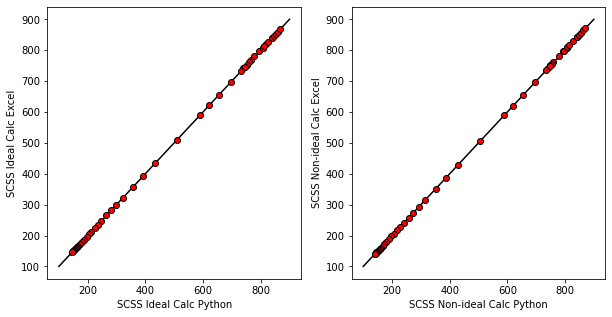

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([100, 900], [100, 900], '-k')
ax1.plot(Smythe_FixedSulf_Meas_Sulf['SCSS_ideal_ppm_Smythe2017'], 
         Liqs['Smythe_SCSS_CalcSulf_Ideal'],  'ok', mfc='red')

ax2.plot([100, 900], [100, 900], '-k')
ax2.plot(Smythe_FixedSulf_Meas_Sulf['SCSS_non_ideal_ppm_Smythe2017'], 
         Liqs['Smythe_SCSS_CalcSulf_NonIdeal'], 'ok', mfc='red')

ax1.set_xlabel('SCSS Ideal Calc Python')
ax1.set_ylabel('SCSS Ideal Calc Excel')
ax2.set_xlabel('SCSS Non-ideal Calc Python')
ax2.set_ylabel('SCSS Non-ideal Calc Excel')


## Test 1 - Calculating Sulfide composition using Ni and Cu contents in the liquid
- The slight 2 ppm discrepencies result from the fact that in "Calculations 2" of Smythe et al. (2017), atomic percentages etc. are calculated including Ni and Cu in the liquid, yet in Calculations 1, Ni and Cu are not used. For consistency, we follow calculations 1, as the differences are negligable. 

In [15]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['Temp (°C)']+273.15, 
P_kbar=Liqs['Pres (GPa)']*10, Fe_FeNiCu_Sulf="Calc_Smythe",
Fe3Fet_Liq=Liqs['Fe3Fet_Liq'], Ni_Liq=Liqs['Ni_Liq (ppm)'], Cu_Liq=Liqs['Cu_Liq (ppm)'])

[11.44978753 18.75926779]
[11.00319514 19.08156647]
[10.37800518 18.91376488]
[ 9.97273025 18.79367351]
[ 9.23739408 18.80329834]
[ 8.76063064 18.82855509]
[ 8.09671329 18.85345533]
[ 7.68480249 18.86214778]
[ 7.10792407 18.86450087]
[ 6.74812009 18.85958444]
[ 6.24180201 18.84351677]
[ 5.92458925 18.82758708]
[ 5.92458925 18.82758708]
[ 5.77163703 18.81820118]
[ 5.6222732  18.80793098]
[ 5.47637006 18.79682307]
[ 5.33390368 18.78562709]
[ 5.21425138 18.43718474]
[ 5.03703833 17.85766232]
[ 4.88532738 17.34251638]
[ 4.74759128 16.86456646]
[ 4.61887906 16.41275588]
[ 4.49711089 15.98674364]
[ 4.12183617 14.67883457]
[ 3.65182156 13.04110421]
[ 3.30055536 11.84975353]
[ 2.94688568 10.68935187]
[2.46958966 9.19231055]
[2.10705943 8.10891872]
[1.74105796 7.060624  ]
[1.37236793 6.04840384]
[0.87842538 4.75626484]
[0.5078416  3.83115411]
[0.12085696 2.90525943]
[0.         1.72061565]
[0.         0.89464655]
[0.         0.12347637]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0

c:\users\penny\onedrive - oregon state university\postdoc\pysulfsat\pyscss_structure\src\PySCSS\scss_calcs2.py:323: RuntimeWarning: divide by zero encountered in log10
  DNi=(10**(B_Ni/T_K+A_Ni-np.log10(Fe_Corr)+(1673*eps_FeO_Ni*np.log10(1-0.049*O_Sulf)/T_K)
c:\users\penny\onedrive - oregon state university\postdoc\pysulfsat\pyscss_structure\src\PySCSS\scss_calcs2.py:326: RuntimeWarning: divide by zero encountered in log10
  DCu=(10**(B_Cu/T_K+A_Cu-0.5*np.log10(Fe_Corr)+(1673*eps_FeO_Cu*np.log10(1-0.049*O_Sulf)/T_K)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'SCSS Non-ideal Calc Excel')

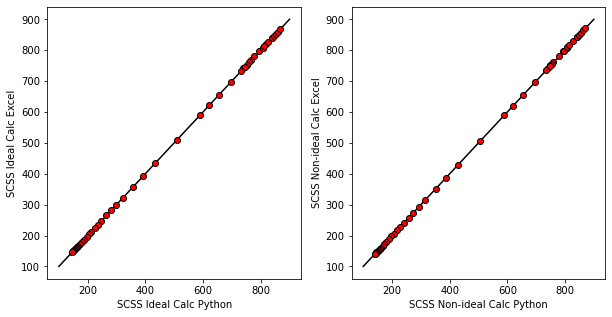

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([100, 900], [100, 900], '-k')
ax1.plot(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'], 
         Liqs['Smythe_SCSS_CalcSulf_Ideal'],  'ok', mfc='red')

ax2.plot([100, 900], [100, 900], '-k')
ax2.plot(Smythe_CalcSulf['SCSS_non_ideal_ppm_Smythe2017'], 
         Liqs['Smythe_SCSS_CalcSulf_NonIdeal'], 'ok', mfc='red')

ax1.set_xlabel('SCSS Ideal Calc Python')
ax1.set_ylabel('SCSS Ideal Calc Excel')
ax2.set_xlabel('SCSS Non-ideal Calc Python')
ax2.set_ylabel('SCSS Non-ideal Calc Excel')


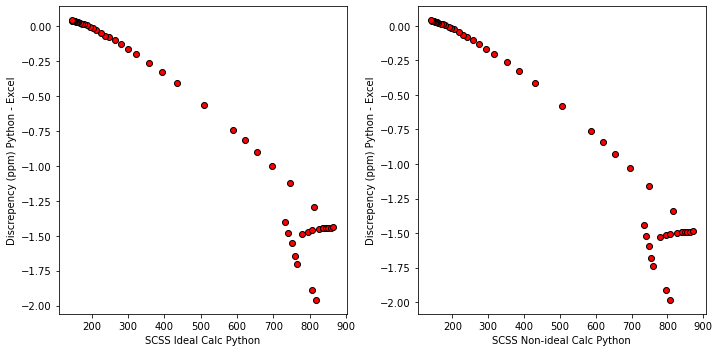

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'], 
         Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']-
        Liqs['Smythe_SCSS_CalcSulf_Ideal'],  'ok', mfc='red')
ax1.set_xlabel('SCSS Ideal Calc Python')
ax1.set_ylabel('Discrepency (ppm) Python - Excel')

ax2.plot(Smythe_CalcSulf['SCSS_non_ideal_ppm_Smythe2017'],
         Smythe_CalcSulf['SCSS_non_ideal_ppm_Smythe2017']- 
        Liqs['Smythe_SCSS_CalcSulf_NonIdeal'],  'ok', mfc='red')
ax2.set_xlabel('SCSS Non-ideal Calc Python')
ax2.set_ylabel('Discrepency (ppm) Python - Excel')
fig.tight_layout()

### Comparing calculated sulfide compositions from Excel vs. PySulfSat

Text(0, 0.5, 'Spreadsheet Calc Fe Sulf')

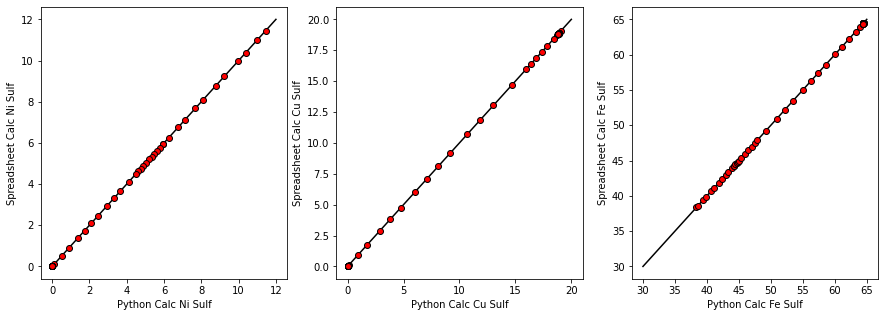

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.plot([0, 12], [0, 12], '-k')
ax1.plot(Smythe_CalcSulf['Ni_Sulf_Calc'], Liqs['Ni_Sulf_Calc'], 'ok', mfc='red')
ax1.set_xlabel('Python Calc Ni Sulf')
ax1.set_ylabel('Spreadsheet Calc Ni Sulf')

ax2.plot([0, 20], [0, 20], '-k')
ax2.plot(Smythe_CalcSulf['Cu_Sulf_Calc'], Liqs['Cu_Sulf_Calc'],  'ok', mfc='red')
ax2.set_xlabel('Python Calc Cu Sulf')
ax2.set_ylabel('Spreadsheet Calc Cu Sulf')

ax3.plot([30, 65], [30, 65], '-k')
ax3.plot(Smythe_CalcSulf['Fe_Sulf_Calc'], Liqs['Fe_Sulf_Calc'], 'ok', mfc='red')
ax3.set_xlabel('Python Calc Fe Sulf')
ax3.set_ylabel('Spreadsheet Calc Fe Sulf')

## Can also use the Fe_FeNiCu equation of O'Neill (2021)

In [19]:
Smythe_CalcSulf_ONeill=ss.calculate_Smythe2017_SCSS(df=Liqs, T_K=Liqs['Temp (°C)']+273.15, P_kbar=Liqs['Pres (GPa)']*10, 
                               Fe_FeNiCu_Sulf="Calc_ONeill",
                               Fe3Fet_Liq=Liqs['Fe3Fet_Liq'],
                        Ni_Liq=Liqs['Ni_Liq (ppm)'], Cu_Liq=Liqs['Cu_Liq (ppm)'])

You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS
